<a href="https://colab.research.google.com/github/Hasibur445/MNIST_classification/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

# Load Dataset

In [ ]:
(x_train,y_train) , (x_test,y_test) = tf.keras.datasets.mnist.load_data()

# Visualize

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


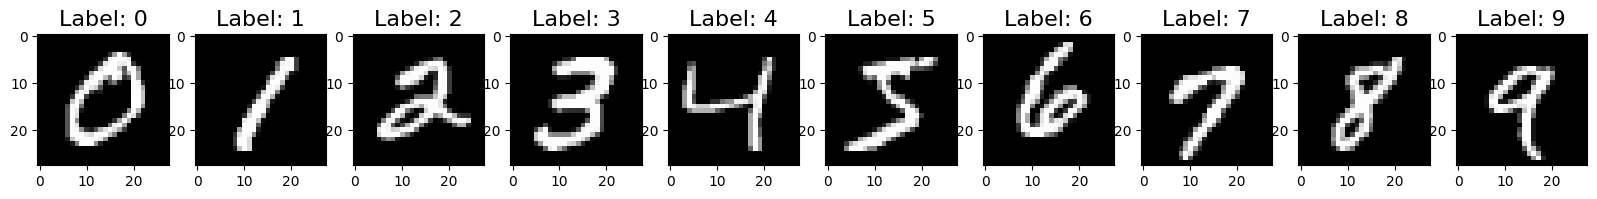

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

# Prepare Data

In [ ]:

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:

# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Model Initialization

## Fully Connected

In [ ]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Training

In [ ]:

batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 3s 14ms/step - loss: 0.6003 - accuracy: 0.8260
Epoch 2/10
118/118 [==============================] - 1s 12ms/step - loss: 0.2227 - accuracy: 0.9352
Epoch 3/10
118/118 [==============================] - 1s 9ms/step - loss: 0.1622 - accuracy: 0.9529
Epoch 4/10
118/118 [==============================] - 1s 9ms/step - loss: 0.1281 - accuracy: 0.9625
Epoch 5/10
118/118 [==============================] - 1s 9ms/step - loss: 0.1050 - accuracy: 0.9686
Epoch 6/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0894 - accuracy: 0.9734
Epoch 7/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0787 - accuracy: 0.9763
Epoch 8/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0673 - accuracy: 0.9798
Epoch 9/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0608 - accuracy: 0.9817
Epoch 10/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0548 - accuracy: 0.98

# Evaluation

In [ ]:

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0731 - accuracy: 0.9772
Test Loss: 0.07309676706790924, Test Accuracy: 0.9771999716758728


In [ ]:

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 3ms/step
[[2.9490789e-07 1.1195368e-06 3.8985505e-05 ... 9.9980092e-01
  2.6822354e-06 4.8621867e-05]
 [7.0835555e-09 2.8484457e-04 9.9970412e-01 ... 7.8123890e-09
  2.0230553e-07 4.7994914e-11]
 [3.0799845e-06 9.9866009e-01 1.1775982e-04 ... 5.0441967e-04
  8.9405912e-05 2.4319774e-05]
 ...
 [8.5601320e-10 1.0291756e-08 7.6610274e-10 ... 1.9107674e-06
  1.2204537e-06 1.3849376e-04]
 [4.9219018e-08 1.2067853e-08 4.4812931e-10 ... 2.7945570e-09
  4.6858178e-05 2.2655165e-08]
 [1.6510036e-07 2.6712519e-11 2.4311325e-10 ... 4.2296713e-12
  8.9912067e-10 5.6136977e-11]]
[7 2 1 ... 4 5 6]


## Single Example

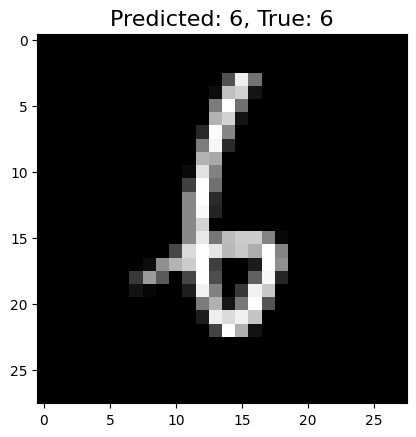

In [ ]:

# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

## Confusion Matrix

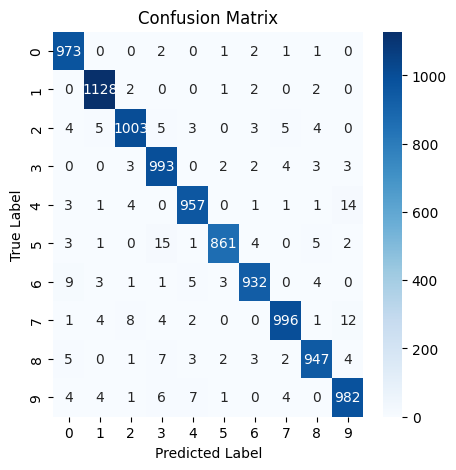

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

# Investigating Errors

In [ ]:

errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [ ]:

y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

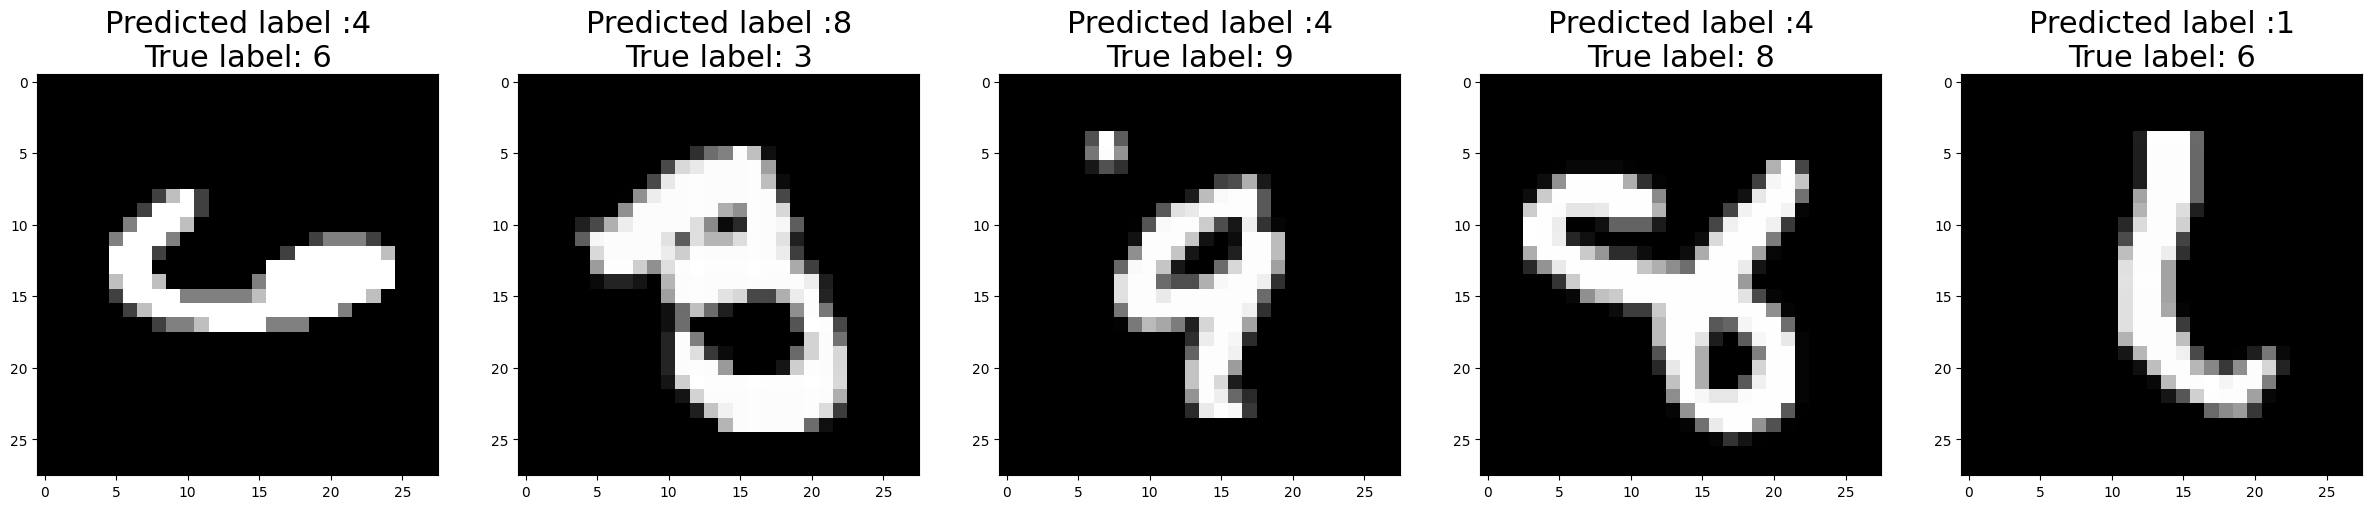

In [ ]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)